In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import json 
from sklearn.metrics import roc_curve

In [2]:
INPUT_PATH = "../../data/lda/manual_ratings_topic19_merged.json"

In [ ]:
# ratings were created in lda_manual_ratings.ipynb
ratings_dict = json.load(open(INPUT_PATH))
ratings = ratings_dict["ratings_merged"]
probabilities = ratings_dict["probabilities"]

FileNotFoundError: [Errno 2] No such file or directory: '../../data/lda/manual_ratings_topic19_merged.json'

In [ ]:
X = np.array(probabilities).reshape(-1, 1)
y = np.array(ratings)
xs = X.ravel()
ys = y.ravel()

Text(0, 0.5, 'Decision')

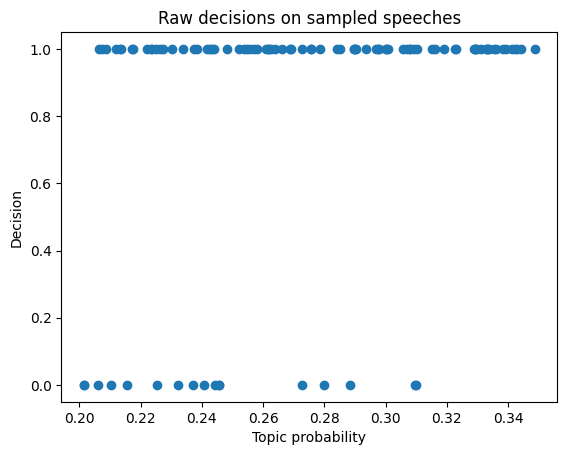

In [ ]:
# scatter plot of raw binary decisions
plt.plot(X, y, 'o')
plt.title("Raw decisions on sampled speeches")
plt.xlabel("Topic probability")
plt.ylabel("Decision")

### Use ROC curve to find optimal threshold

In [ ]:
fpr, tpr, thresholds = roc_curve(y, X)
best = np.argmax(tpr - fpr) # difference between true positive rate and false positive rate
threshold = thresholds[best] 
print(f"Optimal threshold using ROC curve: {threshold:.4f}")
# plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y, X)
plt.plot(fpr, tpr, label='ROC Curve')
# plot points for regular intervals of potential thresholds, plus the  optimal one
for thresh in sorted([threshold, *np.arange(0.2, 0.5, 0.05)]): 
    pred = (xs >= thresh).astype(int)
    fpr = np.sum((pred == 1) & (ys == 0)) / np.sum(ys == 0) # false positive rate under current threshold
    tpr = np.sum((pred == 1) & (ys == 1)) / np.sum(ys == 1) # true positive rate under current threshold
    plt.plot(fpr, tpr, 'o', label=f'Threshold {thresh:.3f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

NameError: name 'y' is not defined

=> we chose threshold 0.25 because it attains best relationship of true positive and false positive rate